# BP Reservoir Permeability -- Measurements on rock samples for rock permeability

**Introduction**

The data set contains measurements on hydrocarbon reservoir rock samples. The interest is predicting rock permeability from various characteristics of pores measurable in thin section. Permeability is a measure how well a fluid (in that case crude oil) or gas can flow through a rock. Thus, permeability has large influence on how well a reservoir can be drained. Porosity alone is not necessarily a good predictor for permeability if they are not well connected. Typically, permeability is determined in the laboratory on rock samples by pushing a fluid through the sample. The data set contains a total 48 samples (12 rock cores, on each 4 thin-section measurements for variance within in a core) with the features: 1) Area of pores, 2) Perimeter of pores, 3) Shape of pores (perimeter/sqrt(area)). The target value is Permeability in milli Darcy.

**The Business Case**

Permeability is perfectly measured only in the laboratory on small samples that are costly to obtain and take a long time to produce. Predicting permeability from cheaper measurements in place will make the reservoir characterization process more efficient.

**Description of Data Set**

Twelve core samples from petroleum reservoirs were sampled by 4 cross-sections. Each core sample was measured for permeability, and each cross-section has total area of pores, total perimeter of pores, and shape. 

A data frame with 48 rows and 4 numeric columns.
1. "area" area of pores space, in pixels out of 256 by 256
2. "peri" perimeter of pores in pixels
3. "shape" perimeter/sqrt(area)
4. "perm" permeability in milli-Darcies 

**Data source**

Courtesy of BP Research and University of Oxford.
The data were collected and kindly made  available  by  R. Katz  of the Department of Statistics at the University of Oxford.
Katz, R. (1995) Spatial Analysis of Pore  Images.  D.Phil. thesis, Department of Statistics, University of Oxford.

**Data host**

https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/rock.html

## Download and explore the data set

In [31]:
import os

if os.path.isfile('./rock.csv') == False:
    !wget https://vincentarelbundock.github.io/Rdatasets/csv/datasets/rock.csv

--2019-08-27 16:33:15--  https://vincentarelbundock.github.io/Rdatasets/csv/datasets/rock.csv
Resolving vincentarelbundock.github.io (vincentarelbundock.github.io)... 185.199.110.153, 185.199.108.153, 185.199.109.153, ...
Connecting to vincentarelbundock.github.io (vincentarelbundock.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1530 (1.5K) [text/csv]
Saving to: 'rock.csv'

     0K .                                                     100% 7.17M=0s

2019-08-27 16:33:15 (7.17 MB/s) - 'rock.csv' saved [1530/1530]



In [32]:
import pandas as pd

rock_df = pd.read_csv("./rock.csv")
rock_df.head()

,Unnamed: 0,area,peri,shape,perm
0,1,4990,2791.90,0.090330,6.3
1,2,7002,3892.60,0.148622,6.3
2,3,7558,3930.66,0.183312,6.3
3,4,7352,3869.32,0.117063,6.3
4,5,7943,3948.54,0.122417,17.1


Remove the first column that seems to be an index

In [33]:
rock_df = pd.DataFrame(rock_df, columns=['area','peri','shape','perm'])
rock_df.head()

,area,peri,shape,perm
0,4990,2791.90,0.090330,6.3
1,7002,3892.60,0.148622,6.3
2,7558,3930.66,0.183312,6.3
3,7352,3869.32,0.117063,6.3
4,7943,3948.54,0.122417,17.1


Check if any missing values (null, NaN) are present.

isnull() is a boolean object and returns True if there are missing values or False if the data frame is complete.

In [34]:
rock_df.isnull().values.any()

False

In [4]:
rock_df.describe()

,area,peri,shape,perm
count,48.000000,48.000000,48.000000,48.000000
mean,7187.729167,2682.211938,0.218110,415.450000
std,2683.848862,1431.661164,0.083496,437.818226
min,1016.000000,308.642000,0.090330,6.300000
25%,5305.250000,1414.907500,0.162262,76.450000
50%,7487.000000,2536.195000,0.198862,130.500000
75%,8869.500000,3989.522500,0.262670,777.500000
max,12212.000000,4864.220000,0.464125,1300.000000


The permeabilibty values have large range from 6.3 upt to 1300!

## Area

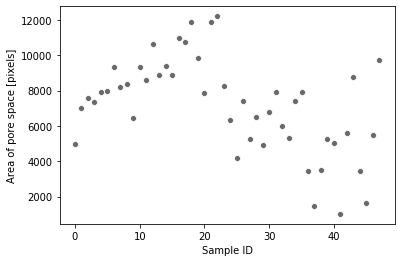

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=rock_df.index, y="area", data=rock_df, color="dimgray")
plt.xlabel("Sample ID")
plt.ylabel("Area of pore space [pixels]")
plt.show()

[Text(0, 0.5, 'Area of pore space [pixels]')]

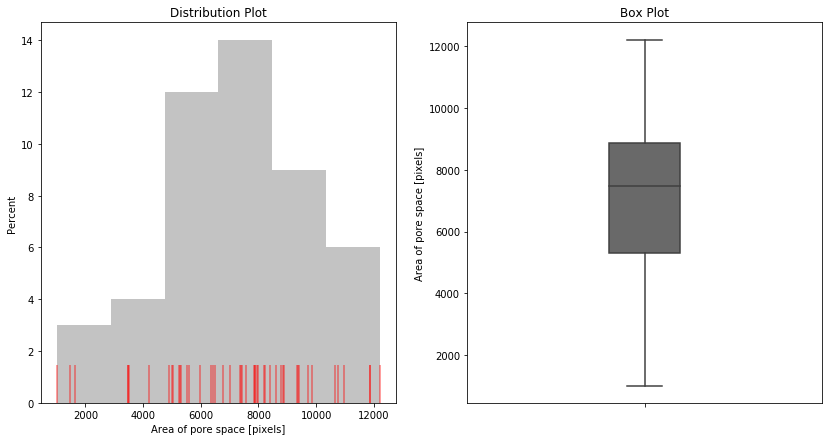

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['area'], kde=False, color="dimgray", rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1})
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Area of pore space [pixels]', ylabel='Percent')

sns.boxplot(y="area", data=rock_df, ax=axs[1], color='dimgray', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Area of pore space [pixels]')

## Perimeter

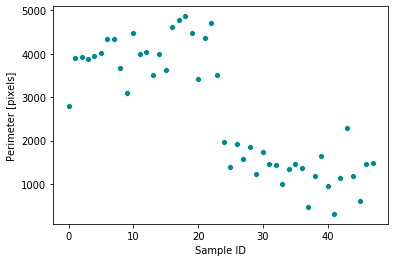

In [94]:
sns.scatterplot(x=rock_df.index, y="peri", data=rock_df, color="darkcyan")
plt.xlabel("Sample ID")
plt.ylabel("Perimeter [pixels]")
plt.show()

[Text(0, 0.5, 'Perimeter [pixels]')]

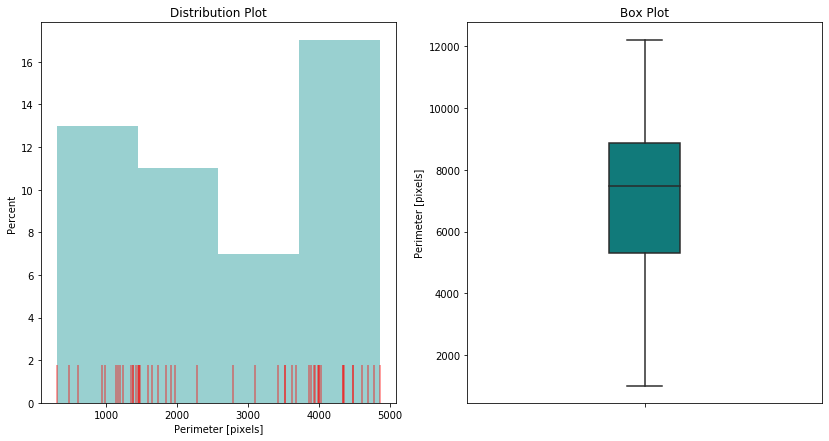

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['peri'], kde=False, color='darkcyan', rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1})
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Perimeter [pixels]', ylabel='Percent')

sns.boxplot(y="area", data=rock_df, ax=axs[1], color='darkcyan', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Perimeter [pixels]')

## Shape

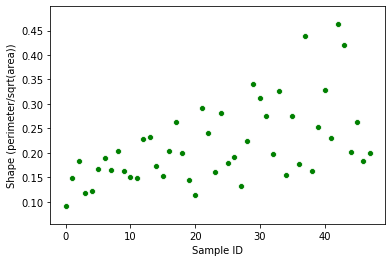

In [100]:
sns.scatterplot(x=rock_df.index, y="shape", data=rock_df, color='green')
plt.xlabel("Sample ID")
plt.ylabel("Shape (perimeter/sqrt(area))")
plt.show()

[Text(0, 0.5, 'Shape (perimeter/sqrt(area))')]

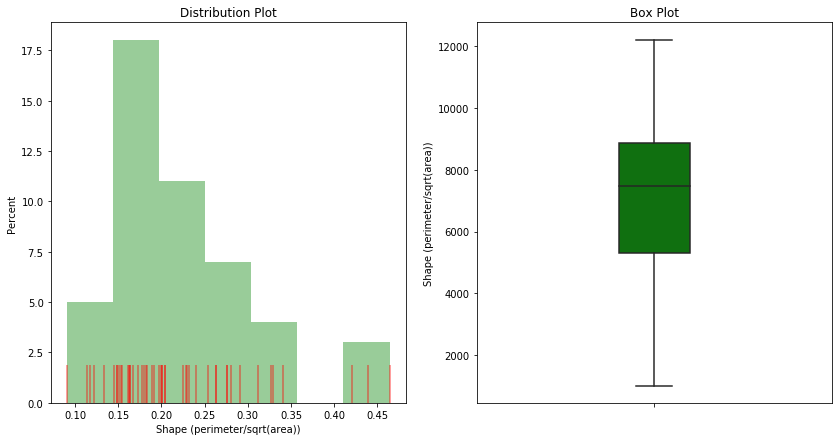

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['shape'], kde=False, color='green', rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1})
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Shape (perimeter/sqrt(area))', ylabel='Percent')

sns.boxplot(y="area", data=rock_df, ax=axs[1], color='green', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Shape (perimeter/sqrt(area))')

## Permeability

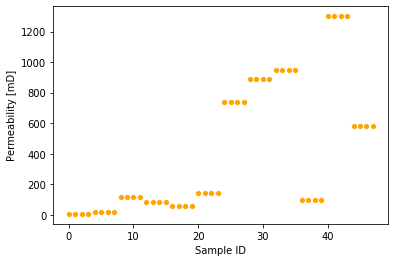

In [103]:
sns.scatterplot(x=rock_df.index, y="perm", data=rock_df, color="orange")
plt.xlabel("Sample ID")
plt.ylabel("Permeability [mD]")
plt.show()

The Permeability values of the four cross sections are very similar to each other.

[Text(0, 0.5, 'Permeability [mD]')]

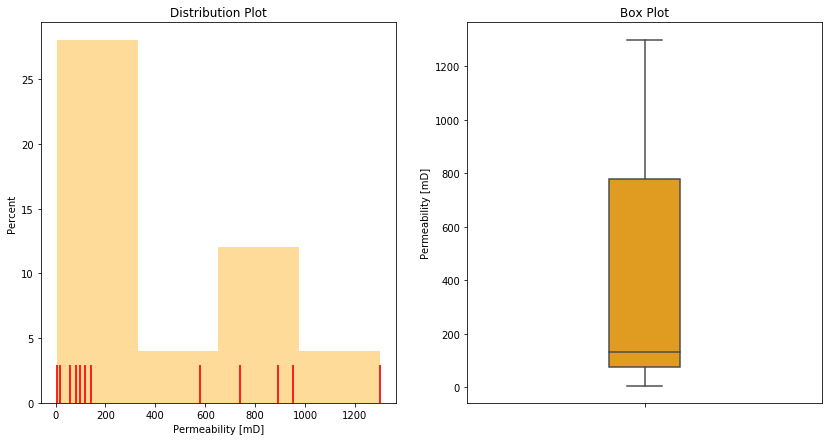

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.distplot(rock_df['perm'], kde=False, color='orange', rug=True, ax=axs[0], rug_kws={"color": "r", "alpha":0.5, "linewidth": 1.5, "height":0.1 })
axs[0].set_title('Distribution Plot')
axs[0].set(xlabel='Permeability [mD]', ylabel='Percent')

sns.boxplot(y="perm", data=rock_df, ax=axs[1], color='orange', width=0.2)
axs[1].set_title('Box Plot')
axs[1].set(ylabel='Permeability [mD]')

Most of the reservoir samples have lower permeability. Permeability per core does not vary greatly.

## Correlations between features

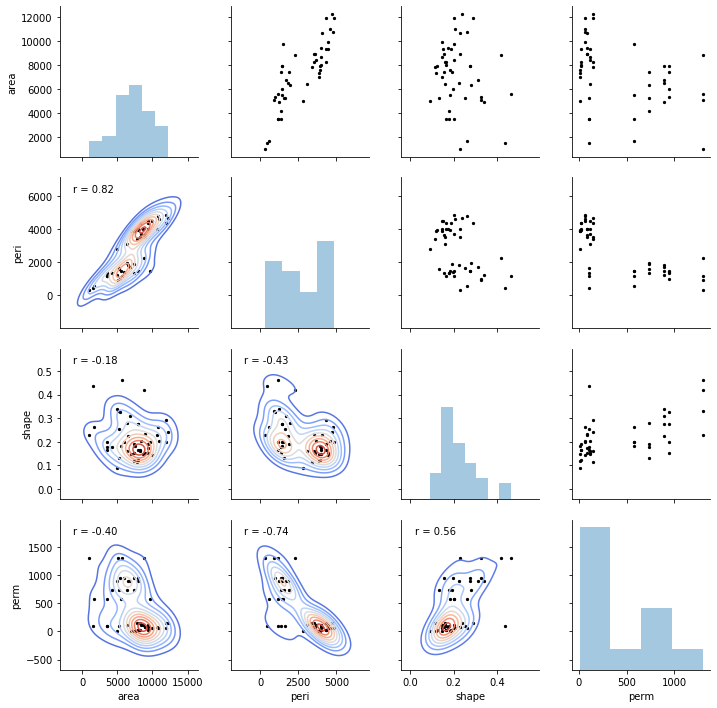

In [13]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(rock_df, palette=["red"])
g.map_upper(plt.scatter, s=5, color="black")
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="coolwarm")
g.map_lower(corrfunc)
g.map_lower(plt.scatter, s=5, color="black")

Remarkable correlations:
- Area of pore space correlates positively with Perimeter. (r = 0.82)
- Perimeter correlates negatively with Permeability. (r = =0.74)

## Feature and target splitting

 Since the data set contains only 12 different permeability values, we are going to train the model using a fold cross-validation and score it on the whole dataset. No traditional Train - CrossValidation - Test splitting.

In [14]:
#split features and label

X = rock_df.drop('perm', axis=1)
X.head()

,area,peri,shape
0,4990,2791.90,0.090330
1,7002,3892.60,0.148622
2,7558,3930.66,0.183312
3,7352,3869.32,0.117063
4,7943,3948.54,0.122417


In [15]:
y = rock_df.drop(['area','peri','shape'], axis=1)
y.head()

,perm
0,6.3
1,6.3
2,6.3
3,6.3
4,17.1


## Part I:  Machine Learning Models

The following regression models for continuous data are implemented as cross validation, which is very simple in SciKit-Learn.

In the graphs, the black line is the perfect 1:1 fit of actual vs fit values. The more similar the blue regression line is to the 1:1 line, the better the prediction.

## Support Vector Regression (SVR)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

SVRScore_df = pd.DataFrame(columns=['CV','C','mean_score'])
max_CV = 7
C_selection = [1, 10, 100, 1000]

for C in C_selection:
    for i in range(2,max_CV):
        clf = SVR(kernel='linear', C=C)
        scores = cross_val_score(clf, X, y.values.ravel(), cv=i)
        SVRScore_df = SVRScore_df.append({'CV' : i, 'C' : C, 'mean_score' : scores.mean()}, ignore_index=True)

SVRScore_df = SVRScore_df.sort_values(by=['mean_score'], ascending=False).head()
SVRScore_df

,CV,C,mean_score
1,3.0,1.0,-0.989556
6,3.0,10.0,-1.922642
11,3.0,100.0,-3.041334
3,5.0,1.0,-5.317208
2,4.0,1.0,-8.446849


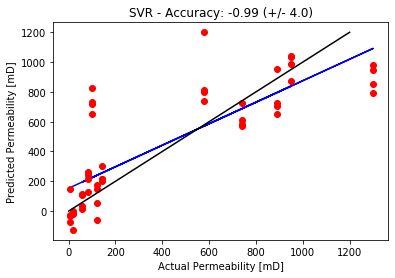

In [17]:
best_cv = int(SVRScore_df.iloc[0,0])
best_C = int(SVRScore_df.iloc[0,1])

clf = SVR(kernel='linear', C=best_C)
scores = cross_val_score(clf, X, y.values.ravel(), cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y.values.ravel(), cv=best_cv)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y, y_hat)
ygraph_pred = linearRegressor.predict(y)

plt.plot(y, ygraph_pred, color = 'blue')
plt.plot(y, y_hat, 'ro')
plt.plot([0, 1200], [0, 1200], 'k-')
plt.title('SVR - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

LinearScore_df = pd.DataFrame(columns=['CV','mean_score'])
max_CV = 7

for i in range(2,max_CV):
    clf = LinearRegression()
    scores = cross_val_score(clf, X, y, cv=i)
    LinearScore_df = LinearScore_df.append({'CV' : i, 'mean_score' : scores.mean()}, ignore_index=True)

LinearScore_df = LinearScore_df.sort_values(by=['mean_score'], ascending=False).head()
LinearScore_df

,CV,mean_score
1,3.0,-1.661311
3,5.0,-6.981092
0,2.0,-8.296883
2,4.0,-10.862764
4,6.0,-67.025904


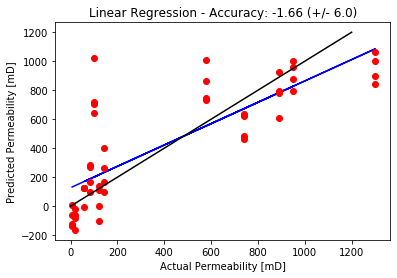

In [19]:
best_cv = int(LinearScore_df.iloc[0,0])

clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y, cv=best_cv)

# plot regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y, y_hat)
ygraph_pred = linearRegressor.predict(y)

plt.plot(y, ygraph_pred, color = 'blue')
plt.plot(y, y_hat, 'ro')
plt.plot([0, 1200], [0, 1200], 'k-')
plt.title('Linear Regression - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

TreeScore_df = pd.DataFrame(columns=['CV','mean_score'])
max_CV = 7

for i in range(2,max_CV):
    clf = DecisionTreeRegressor(random_state=0)
    scores = cross_val_score(clf, X, y, cv=i)
    TreeScore_df = TreeScore_df.append({'CV' : i, 'mean_score' : scores.mean()}, ignore_index=True)

TreeScore_df = TreeScore_df.sort_values(by=['mean_score'], ascending=False).head()
TreeScore_df

,CV,mean_score
1,3.0,-1.005437
3,5.0,-3.172800
2,4.0,-9.738366
0,2.0,-72.753716
4,6.0,-79.659107


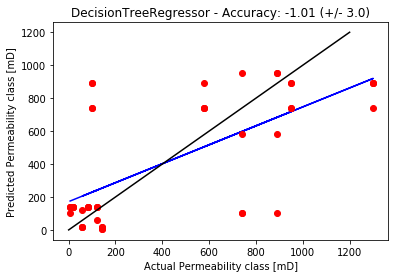

In [21]:
best_cv = int(TreeScore_df.iloc[0,0])

clf = DecisionTreeRegressor(random_state=0)
scores = cross_val_score(clf, X, y, cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y, cv=best_cv)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y, y_hat)
ygraph_pred = linearRegressor.predict(y)

plt.plot(y, ygraph_pred, color = 'blue')
plt.plot(y, y_hat, 'ro')
plt.plot([0, 1200], [0, 1200], 'k-')
plt.title('DecisionTreeRegressor - {}'.format(score_str))
plt.xlabel('Actual Permeability class [mD]')
plt.ylabel('Predicted Permeability class [mD]')
plt.show()

## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

ForestScore_df = pd.DataFrame(columns=['CV','estimators','mean_score'])
max_CV = 7
max_estimators = 10

for estimator in range(1,max_estimators):
    for i in range(2,max_CV):
        clf = RandomForestRegressor(n_estimators=estimator, random_state=0)
        scores = cross_val_score(clf, X, y.values.ravel(), cv=i)
        ForestScore_df = ForestScore_df.append({'CV' : i, 'estimators': estimator, 'mean_score' : scores.mean()}, ignore_index=True)

ForestScore_df = ForestScore_df.sort_values(by=['mean_score'], ascending=False).head()
ForestScore_df

,CV,estimators,mean_score
36,3.0,8.0,-1.498307
28,5.0,6.0,-1.568331
33,5.0,7.0,-1.580453
11,3.0,3.0,-1.599317
18,5.0,4.0,-1.617999


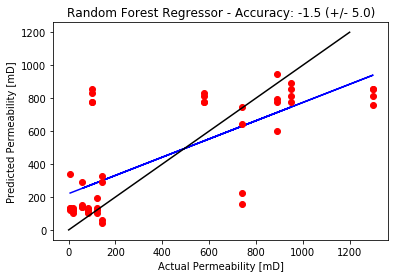

In [23]:
# this regressor seems to be very variable with the mean accuracy depending how the folds are being randomly selected. The data set seems to be too heterogenous and too small

best_cv = int(ForestScore_df.iloc[0,0])
best_estimators = int(ForestScore_df.iloc[0,1])

clf = RandomForestRegressor(n_estimators=best_estimators, random_state=0)
scores = cross_val_score(clf, X, y.values.ravel(), cv=best_cv,)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y.values.ravel(), cv=best_cv)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y, y_hat)
ygraph_pred = linearRegressor.predict(y)

plt.plot(y, ygraph_pred, color = 'blue')
plt.plot(y, y_hat, 'ro')
plt.plot([0, 1200], [0, 1200], 'k-')
plt.title('Random Forest Regressor - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## K-Nearest Neighbors Regression (KNN Regressor)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

KNNscore_df = pd.DataFrame(columns=['CV','K','mean_score'])
max_K = 10
max_CV = 7

for K in range(max_K):
    K = K+1
    for i in range(2,max_CV):
        clf = KNeighborsRegressor(n_neighbors=K)
        scores = cross_val_score(clf, X, y, cv=i)
        KNNscore_df = KNNscore_df.append({'CV' : i, 'K': K, 'mean_score' : scores.mean()}, ignore_index=True)
        i = i+1

KNNscore_df = KNNscore_df.sort_values(by=['mean_score'], ascending=False).head()
KNNscore_df

,CV,K,mean_score
1,3.0,1.0,-4.398954
3,5.0,1.0,-6.863654
6,3.0,2.0,-6.986444
17,4.0,4.0,-7.472806
18,5.0,4.0,-7.730019


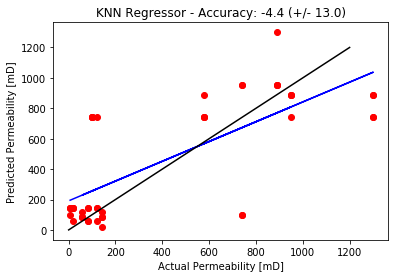

In [25]:
best_cv = int(KNNscore_df.iloc[0,0])
best_K = int(KNNscore_df.iloc[0,1])

clf = KNeighborsRegressor(n_neighbors=best_K)
scores = cross_val_score(clf, X, y, cv=best_cv)

score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)

y_hat = cross_val_predict(clf, X, y, cv=best_cv)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y, y_hat)
ygraph_pred = linearRegressor.predict(y)

plt.plot(y, ygraph_pred, color = 'blue')
plt.plot(y, y_hat, 'ro')
plt.plot([0, 1200], [0, 1200], 'k-')
plt.title('KNN Regressor - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Gradient Boosting Regressor

In [26]:
from sklearn import ensemble

GradientBoostingScore_df = pd.DataFrame(columns=['CV','mean_score'])
max_CV = 10

for i in range(2,max_CV):
    clf = ensemble.GradientBoostingRegressor(random_state=0)
    scores = cross_val_score(clf, X, y.values.ravel(), cv=i)
    GradientBoostingScore_df = GradientBoostingScore_df.append({'CV' : i, 'mean_score' : scores.mean()}, ignore_index=True)
    i = i+1

GradientBoostingScore_df = GradientBoostingScore_df.sort_values(by=['mean_score'], ascending=False).head()
GradientBoostingScore_df

,CV,mean_score
1,3.0,-1.343276
3,5.0,-3.005230
2,4.0,-8.713362
7,9.0,-57.406458
5,7.0,-57.726634


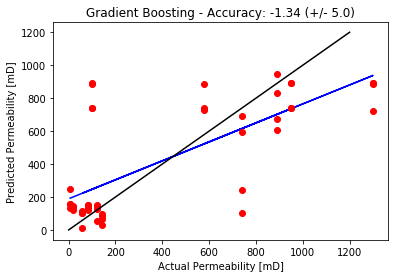

In [27]:
best_cv = int(GradientBoostingScore_df.iloc[0,0])

clf = ensemble.GradientBoostingRegressor(random_state=0)
scores = cross_val_score(clf, X, y.values.ravel(), cv=best_cv)
score_str = "Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std() * 2),2)
y_hat = cross_val_predict(clf, X, y.values.ravel(), cv=best_cv)

# regression predection vs actual
linearRegressor = LinearRegression()
linearRegressor.fit(y, y_hat)
ygraph_pred = linearRegressor.predict(y)

plt.plot(y, ygraph_pred, color = 'blue')
plt.plot(y, y_hat, 'ro')
plt.plot([0, 1200], [0, 1200], 'k-')
plt.title('Gradient Boosting - {}'.format(score_str))
plt.xlabel('Actual Permeability [mD]')
plt.ylabel('Predicted Permeability [mD]')
plt.show()

## Coclusion

This data set is very small and only twelve target values are available. Support Vector Regression yields the highest scores. With additional optimization all scores may still improve a bit. For example with a CV Grid Search.

In [28]:
data = {'Algorithm': ['Support Vector Regression', 'Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'K-Nearest Neighbor Regressor', 'Gradient Boosting'],
        'mean_score':[SVRScore_df.iloc[0].at['mean_score'], LinearScore_df.iloc[0].at['mean_score'], TreeScore_df.iloc[0].at['mean_score'], ForestScore_df.iloc[0].at['mean_score'], KNNscore_df.iloc[0].at['mean_score'], GradientBoostingScore_df.iloc[0].at['mean_score']]}

df_comp = pd.DataFrame(data)
df_comp.sort_values(by=['mean_score'], inplace=True, ascending=False)
df_comp

,Algorithm,mean_score
0,Support Vector Regression,-0.989556
2,Decision Tree Regressor,-1.005437
5,Gradient Boosting,-1.343276
3,Random Forest Regressor,-1.498307
1,Linear Regression,-1.661311
4,K-Nearest Neighbor Regressor,-4.398954


## Part II: Deep Learning Models

A small Neural Network may provide better performance. Let's try it out.

In [30]:
import keras

Using TensorFlow backend.
